In [1]:
!git clone https://github.com/santosh2702/Udemy-Machine-Learning-A-Z.git

Cloning into 'Udemy-Machine-Learning-A-Z'...
remote: Enumerating objects: 4431, done.
remote: Total 4431 (delta 0), reused 0 (delta 0), pack-reused 4431 (from 1)
Receiving objects: 100% (4431/4431), 93.17 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (172/172), done.
Updating files: 100% (4199/4199), done.


In [2]:
!ls Udemy-Machine-Learning-A-Z/Deep\ Learning/Convolution\ Neural\ Network/dataset/


test_set  training_set


In [3]:
dataset_path = 'Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset'


In [4]:
dataset_path = r'Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset'


In [5]:
import os # import the 'os' module to make its functions available.
dataset_path = r'Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset'
os.path.join(dataset_path, 'training_set')

'Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset/training_set'

In [6]:
import os

dataset_path = 'Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset'

print(os.listdir(os.path.join(dataset_path, 'training_set')))


['cats', '.DS_Store', 'dogs']


In [7]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Use tensorflow.keras instead of just keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras.preprocessing.image
import os


In [8]:
# Initializing the CNN model
model = Sequential()

# Step 1 - Convolution Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full Connection (Dense layers)
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale for test data
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [10]:
# Set the dataset path
dataset_path = '/content/Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset'

# Load the training set
training_set = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'training_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Load the test set
test_set = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 3481 images belonging to 2 classes.
Found 615 images belonging to 2 classes.


In [11]:
# Fit the model on the dataset
model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=25,
    validation_data=test_set,
    validation_steps=len(test_set)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 190ms/step - accuracy: 0.5683 - loss: 0.9428 - val_accuracy: 0.5545 - val_loss: 0.6831
Epoch 2/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.6286 - loss: 0.6364 - val_accuracy: 0.5268 - val_loss: 0.7971
Epoch 3/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.6612 - loss: 0.6093 - val_accuracy: 0.6309 - val_loss: 0.6714
Epoch 4/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.6865 - loss: 0.5920 - val_accuracy: 0.6667 - val_loss: 0.6369
Epoch 5/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.7015 - loss: 0.5724 - val_accuracy: 0.6325 - val_loss: 0.6703
Epoch 6/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - accuracy: 0.7102 - loss: 0.5606 - val_accuracy: 0.6211 - val_loss: 0.7151
Epoch 7/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.7303 - loss: 0.5360 - val_accuracy: 0.6732 - val_loss: 0.6646
Epoch 8/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.7323 - loss: 0

In [14]:

# STEP 4: Build the CNN Model
classifier = Sequential()

# Convolution layer
classifier.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

# Pooling layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 5: Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Training set
training_set = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'training_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Test set
test_set = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# STEP 6: Train the model
classifier.fit(
    training_set,
    steps_per_epoch=250,  # total images / batch_size = 8000 / 32
    epochs=15,
    validation_data=test_set,
    validation_steps=63  # 2000 / 32
)


Found 3481 images belonging to 2 classes.
Found 615 images belonging to 2 classes.
Epoch 1/15
109/250 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.5614 - loss: 0.8536

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.5790 - loss: 0.7718 - val_accuracy: 0.5707 - val_loss: 0.6766
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.6398 - loss: 0.6324 - val_accuracy: 0.5837 - val_loss: 0.6722
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.6684 - loss: 0.6050 - val_accuracy: 0.5577 - val_loss: 0.7050
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.6935 - loss: 0.5766 - val_accuracy: 0.5724 - val_loss: 0.7910
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.6965 - loss: 0.5708 - val_accuracy: 0.6211 - val_loss: 0.7256
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7147 - loss: 0.5529 - val_accuracy: 0.6732 - val_loss: 0.6631
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7313 - loss: 0.5353 - val_accuracy: 0.6293 - val_loss: 0.7300
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7444 - loss: 0.5173 - val_accurac

In [15]:
# STEP 7: Evaluate Model Performance
loss, accuracy = classifier.evaluate(test_set, steps=63)
print(f"\n✅ Model Evaluation on Test Set:\nLoss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6834 - loss: 0.6700

✅ Model Evaluation on Test Set:
Loss: 0.6786, Accuracy: 67.97%


In [16]:
from keras.utils import load_img, img_to_array
import numpy as np

# Load a single image to test (you can change the path to any test image)
test_image_path = os.path.join(dataset_path, 'test_set/cats/cat.4001.jpg')  # or 'dogs/dog.4001.jpg'
test_image = load_img(test_image_path, target_size=(64, 64))  # Load and resize
test_image = img_to_array(test_image)  # Convert to numpy array
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
test_image /= 255.0  # Rescale like test_datagen

# Predict
result = classifier.predict(test_image)

# Print result
if result[0][0] > 0.5:
    prediction = 'Dog'
else:
    prediction = 'Cat'

print(f"\n📷 Prediction for test image: {prediction} (Confidence: {result[0][0]:.4f})")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset/test_set/cats/cat.4001.jpg'

In [18]:
import os

dataset_path = '/content/Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset'
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 {root}")
    for file in files:
        print(f"   └── 📄 {file}")


📂 /content/Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset
📂 /content/Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset/training_set
   └── 📄 .DS_Store
📂 /content/Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset/training_set/cats
   └── 📄 cat.2674.jpg
   └── 📄 cat.3692.jpg
   └── 📄 cat.3716.jpg
   └── 📄 cat.3258.jpg
   └── 📄 cat.3950.jpg
   └── 📄 cat.3822.jpg
   └── 📄 cat.2598.jpg
   └── 📄 cat.3565.jpg
   └── 📄 cat.3020.jpg
   └── 📄 cat.3335.jpg
   └── 📄 cat.3663.jpg
   └── 📄 cat.3387.jpg
   └── 📄 cat.3029.jpg
   └── 📄 cat.3290.jpg
   └── 📄 cat.3304.jpg
   └── 📄 cat.2982.jpg
   └── 📄 cat.3937.jpg
   └── 📄 cat.3395.jpg
   └── 📄 cat.3666.jpg
   └── 📄 cat.3972.jpg
   └── 📄 cat.3969.jpg
   └── 📄 cat.3487.jpg
   └── 📄 cat.3154.jpg
   └── 📄 cat.2897.jpg
   └── 📄 cat.2937.jpg
   └── 📄 cat.3355.jpg
   └── 📄 cat.2649.jpg
   └── 📄 cat.3225.jpg
   └── 📄 cat.2624.jpg
   └── 📄 cat.3943.jpg
   └── 📄 cat.2831.jpg
   └── 

In [19]:
test_image_path = os.path.join(dataset_path, 'test_set/cats/cat.2001.jpg')  # Replace with a valid number


In [21]:
import random

cat_dir = os.path.join(dataset_path, 'test_set/cats')
image_name = random.choice(os.listdir(cat_dir))
test_image_path = os.path.join(cat_dir, image_name)

print("🖼️ Using image:", test_image_path)


🖼️ Using image: /content/Udemy-Machine-Learning-A-Z/Deep Learning/Convolution Neural Network/dataset/test_set/cats/cat.4933.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


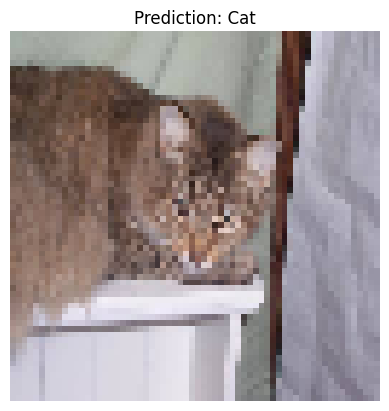

In [22]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
import numpy as np
import os
import random

# Pick a random cat image from the test set
cat_dir = os.path.join(dataset_path, 'test_set/cats')
image_name = random.choice(os.listdir(cat_dir))
test_image_path = os.path.join(cat_dir, image_name)

# Load and preprocess the image
test_image = load_img(test_image_path, target_size=(64, 64))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Predict using the trained model
result = model.predict(test_image_array)
label = "Dog" if result[0][0] > 0.5 else "Cat"

# Plot the image with prediction
plt.imshow(test_image)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Prepare test data
test_dir = os.path.join(dataset_path, 'test_set')
classes = ['cats', 'dogs']
y_true = []
y_pred = []
images = []  # Store images for later visualization
file_paths = []  # To trace misclassified ones

for label, class_name in enumerate(classes):
    class_dir = os.path.join(test_dir, class_name)
    for fname in os.listdir(class_dir):
        fpath = os.path.join(class_dir, fname)
        try:
            image = load_img(fpath, target_size=(64, 64))
            img_array = img_to_array(image)
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array)[0][0]
            predicted_label = 1 if prediction > 0.5 else 0

            y_true.append(label)
            y_pred.append(predicted_label)
            images.append(image)
            file_paths.append(fpath)
        except Exception as e:
            print(f"Skipping {fpath}: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

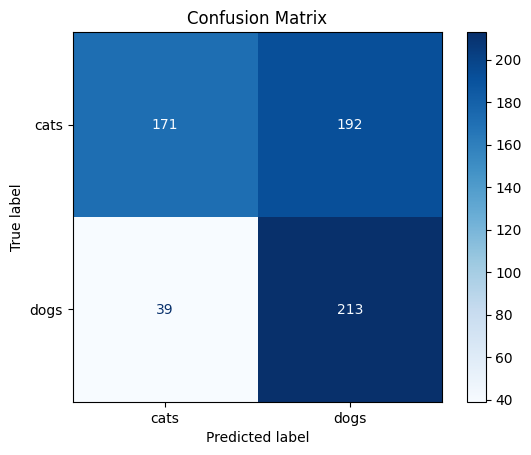

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Total misclassified: 231


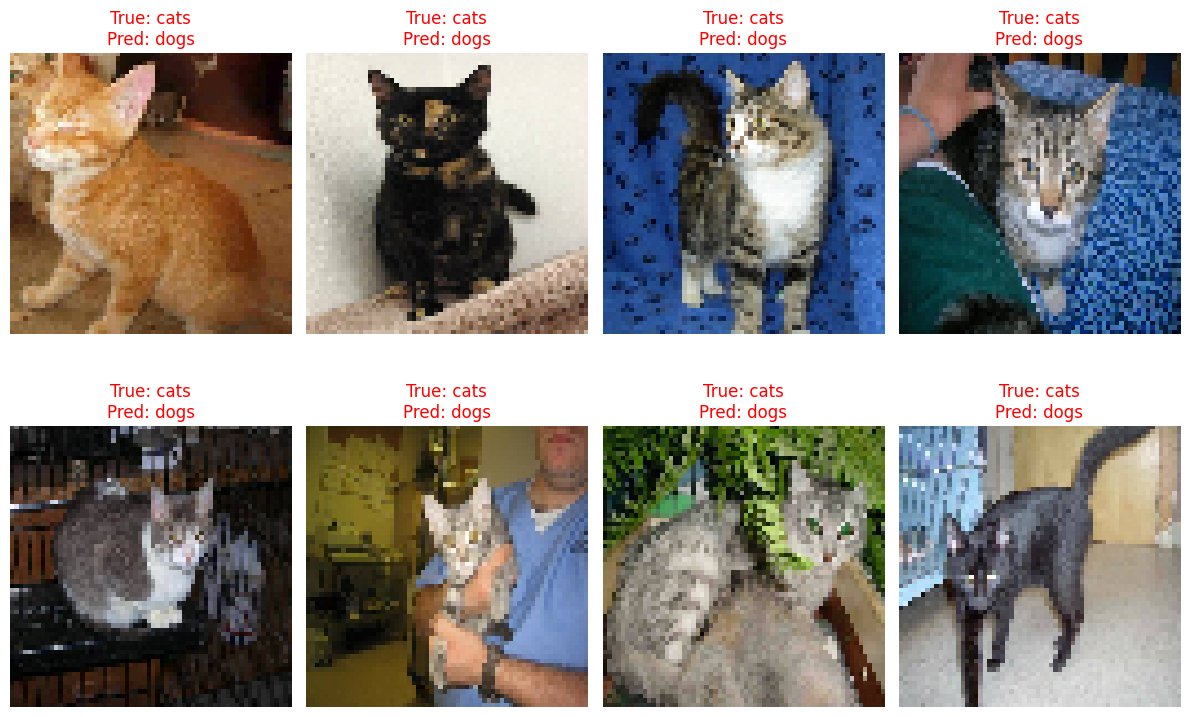

In [25]:
# Show first few misclassified images
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]

print(f"Total misclassified: {len(misclassified_indices)}")

plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:8]):  # show first 8
    plt.subplot(2, 4, i+1)
    plt.imshow(images[idx])
    true_label = classes[y_true[idx]]
    predicted_label = classes[y_pred[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color="red")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy on test set: {acc * 100:.2f}%")


Accuracy on test set: 62.44%


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Correct import

# ... (rest of your code) ...

# Data preprocessing with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'training_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test_set'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Improved CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_set,
    epochs=10,
    validation_data=test_set
)


Found 3481 images belonging to 2 classes.
Found 615 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - accuracy: 0.5531 - loss: 0.6871 - val_accuracy: 0.4098 - val_loss: 0.7428
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 261ms/step - accuracy: 0.5865 - loss: 0.6689 - val_accuracy: 0.4260 - val_loss: 0.8314
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 32s 289ms/step - accuracy: 0.6410 - loss: 0.6453 - val_accuracy: 0.4878 - val_loss: 0.7386
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - accuracy: 0.6443 - loss: 0.6251 - val_accuracy: 0.4829 - val_loss: 0.7554
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 262ms/step - accuracy: 0.6744 - loss: 0.6124 - val_accuracy: 0.6602 - val_loss: 0.6135
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 270ms/step - accuracy: 0.7027 - loss: 0.5684 - val_accuracy: 0.6894 - val_loss: 0.6168
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 30s 277ms/step - accuracy: 0.7193 - loss: 0.5475 - val_accuracy: 0.6650 - val_loss: 0.6336
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 262ms/step - accuracy: 0.7122 - loss: 0

In [29]:
# Evaluate the accuracy on test set
test_loss, test_acc = model.evaluate(test_set)
print(f"Improved Model Accuracy: {test_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.6347 - loss: 0.6722
Improved Model Accuracy: 70.24%


Logistic Regression Accuracy (on PCA): 0.5821138211382114


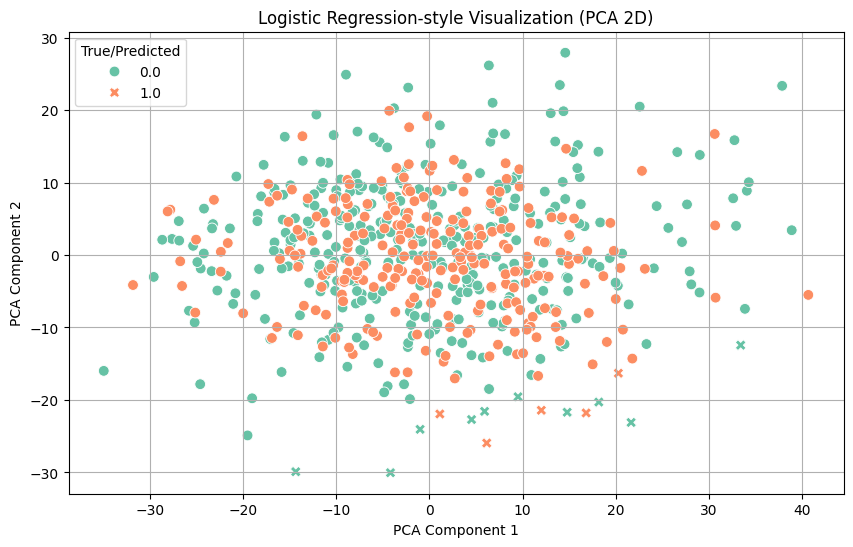

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

# Get features and labels from test set
X_test = []
y_test = []

for i in range(len(test_set)):
    x, y = test_set[i]
    X_test.extend(x)
    y_test.extend(y)
    if i >= len(test_set) - 1:  # Load all batches
        break

X_test = np.array(X_test)
y_test = np.array(y_test)

# Flatten images for PCA/logistic regression
X_flat = X_test.reshape(X_test.shape[0], -1)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_flat)

# Train logistic regression on 2D projections
log_reg = LogisticRegression()
log_reg.fit(X_2d, y_test)

# Predict and plot
y_pred_log = log_reg.predict(X_2d)

# Accuracy
print("Logistic Regression Accuracy (on PCA):", accuracy_score(y_test, y_pred_log))

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y_test, style=y_pred_log,
                palette='Set2', s=60)
plt.title('Logistic Regression-style Visualization (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='True/Predicted')
plt.grid(True)
plt.show()
